In [129]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

In [32]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]]) 

In [59]:
model = Sequential()
model.add(Dense(10, input_dim=2)) # 1일경우 합쳐져서 w1, w2, b 여서 3개의 파라미터
model.add(Activation('sigmoid'))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

#파라미터 개수 공식 (input_dim+1) * 입력개수(5)
#activation 6인이유 5개의 출력 + 1출력

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_30 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 20)                220       
_________________________________________________________________
activation_31 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 30)                630       
_________________________________________________________________
activation_32 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 20)              

In [60]:
#loss : 오차함수
#optimizer = 최적화함수
model.compile(loss='binary_crossentropy', optimizer='adam')

In [61]:
#batch_size : 한번에 경사하강법을 계산할때 트레이닝 데이터의 크기(보통 전체데이터)
model.fit(X,Y,batch_size=4, epochs=3000, verbose=0) # fit은 현재 시점에서 학습을 돌리기 때문에 계속하면 중첩된다.
print(model.predict(X))

[[5.4699340e-04]
 [9.8146099e-01]
 [9.8145133e-01]
 [1.5170351e-02]]


In [62]:
p = model.predict(X)
print((p>0.5)*1)

[[0]
 [1]
 [1]
 [0]]


# 그래프 그리기

(100, 2)
<class 'numpy.ndarray'>
(100, 1)


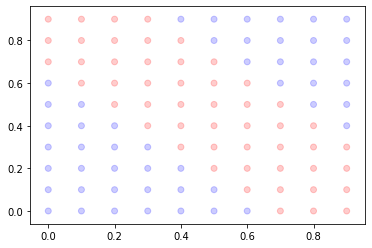

In [64]:
xx, yy = np.mgrid[0:1:0.1, 0:1:0.1] # x가 0~1까지 0.02단위로 2차원 배열을 만들고, y도 0~1까지 0.02단위로 그림
grid = np.c_[xx.flatten(), yy.flatten()] # flatten 2차원 배열을 1차원으로 바꿔주는 함수
print(grid.shape)
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

# make_moons 데이터로 이진 분류 학습

(500,)


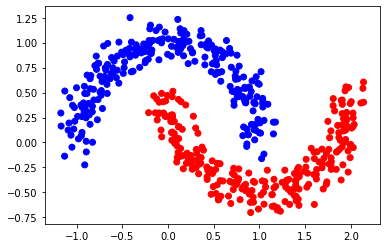

In [122]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

In [133]:
model = Sequential()
model.add(Dense(5,input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy']) # metrics accuracy를 써
model.fit(x_data,y_data,batch_size=100, epochs=3000, verbose=0,validation_data=(x_data,y_data), callbacks=[printepoch(500)]) ## verbose=1 이면 모두 출력
### validation data 에 값을 넣어줌으로 val_loss, val_accuracy 가 나타난다.
history = model.predict(x_data)

0 => {'val_loss': 0.7808019518852234, 'val_accuracy': 0.5, 'loss': 0.8112468838691711, 'accuracy': 0.5}
500 => {'val_loss': 0.2466187983751297, 'val_accuracy': 0.8820000290870667, 'loss': 0.24685764610767363, 'accuracy': 0.884}
1000 => {'val_loss': 0.0044997736345976595, 'val_accuracy': 1.0, 'loss': 0.004531805589795113, 'accuracy': 1.0}
1500 => {'val_loss': 0.0006841474620159716, 'val_accuracy': 1.0, 'loss': 0.0006889328564284369, 'accuracy': 1.0}
2000 => {'val_loss': 0.00016363920803996734, 'val_accuracy': 1.0, 'loss': 0.00017697439070616384, 'accuracy': 1.0}
2500 => {'val_loss': 3.956793561883387e-05, 'val_accuracy': 1.0, 'loss': 3.980733790740487e-05, 'accuracy': 1.0}


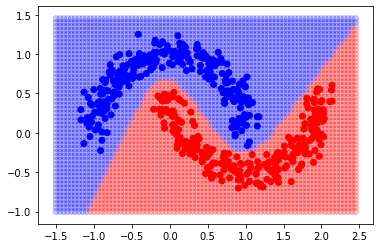

In [125]:
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

# 강사님 코드

0 => {'val_loss': 0.6960903644561768, 'val_accuracy': 0.5, 'loss': 0.6974021792411804, 'accuracy': 0.5}
500 => {'val_loss': 0.14026364982128142, 'val_accuracy': 0.9440000057220459, 'loss': 0.14106895327568053, 'accuracy': 0.944}
1000 => {'val_loss': 0.0037834889255464075, 'val_accuracy': 1.0, 'loss': 0.003949806094169617, 'accuracy': 1.0}
1500 => {'val_loss': 0.0009321568300947547, 'val_accuracy': 1.0, 'loss': 0.0009739661822095513, 'accuracy': 1.0}
2000 => {'val_loss': 0.0003001068107550964, 'val_accuracy': 1.0, 'loss': 0.0003018826770130545, 'accuracy': 1.0}
2500 => {'val_loss': 9.805515583138913e-05, 'val_accuracy': 1.0, 'loss': 9.94670408545062e-05, 'accuracy': 1.0}


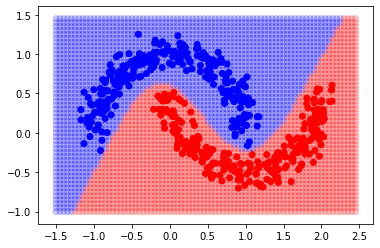

In [135]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(10, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data), callbacks=[printepoch(500)])

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

# LeakyRelu 사용하여 학습하기

In [ ]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=500, noise=0.1)   #  x 는 2차원   y는 레이블    0   1

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  
print(y_data.shape)

In [143]:
model = Sequential([
    Dense(5, activation = LeakyReLU(alpha=0.1), input_dim=2),
    Dense(20, activation = LeakyReLU(alpha=0.1)),
    Dense(10, activation = LeakyReLU(alpha=0.1)),
    Dense(30, activation = LeakyReLU(alpha=0.1)),
    Dense(10, activation = LeakyReLU(alpha=0.1)),
    Dense(40, activation = LeakyReLU(alpha=0.1)),
    Dense(10, activation = LeakyReLU(alpha=0.1)),
    Dense(1, activation = 'sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

0 => {'val_loss': 0.6808399319648742, 'val_accuracy': 0.7279999852180481, 'loss': 0.6893395900726318, 'accuracy': 0.608}
500 => {'val_loss': 1.4536523303831928e-05, 'val_accuracy': 1.0, 'loss': 1.467772517571575e-05, 'accuracy': 1.0}
1000 => {'val_loss': 1.762720535225526e-06, 'val_accuracy': 1.0, 'loss': 1.7764022004485014e-06, 'accuracy': 1.0}
1500 => {'val_loss': 3.477574153976093e-07, 'val_accuracy': 1.0, 'loss': 3.4963846076152547e-07, 'accuracy': 1.0}
2000 => {'val_loss': 7.995645319169853e-08, 'val_accuracy': 1.0, 'loss': 8.050236068868344e-08, 'accuracy': 1.0}
2500 => {'val_loss': 1.814882004680385e-08, 'val_accuracy': 1.0, 'loss': 1.8176932137237144e-08, 'accuracy': 1.0}


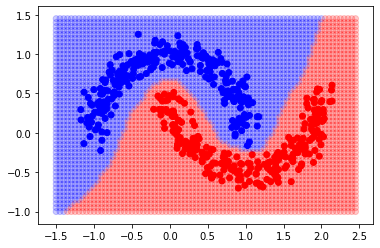

In [144]:
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0, validation_data=(x_data, y_data), callbacks=[printepoch(500)])

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

# 함수활용하여 모델 만들기

In [145]:
def createModel(layers, activation, input_dim):
    model = Sequential()
    d = layers.pop(0)
    model.add(Dense(d, activation=activation,input_dim=input_dim))
    for l in layers:
        model.add(Dense(l, activation=activation))
    model.add(Dense(1,activation='sigmoid'))
    return model

model = createModel([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], LeakyReLU(alpha=0.1),2)